<a href="https://colab.research.google.com/github/WesleySouza13/REGRESSAO-BASE-CARROS-USADOS-/blob/main/regressao_carros_usados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#importação de bibliotecas
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from torch import nn, optim
import torch.nn.functional as F


In [14]:

# o arquivo csv por importado dessa maneira pois estava apresentando o seguinte erro: utf-8' codec can't decode byte 0xdc in position 732: invalid continuation byte
df = pd.read_csv('/content/autos.csv', encoding='latin-1')

In [19]:
#garantir que não haja variação de resultados
np.random.seed(123)
torch.manual_seed(123)

In [20]:
df.head(5) #vizualizar a cabeça do dataset

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [ ]:
#preprocessamento

In [21]:
df.shape

(371528, 20)

In [30]:
#dropando colunas que não servem
df = df.drop(['nrOfPictures'], axis = 1)
df = df.drop(['postalCode'], axis = 1)
df = df.drop(['lastSeen'], axis=1)

In [32]:
df.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [36]:
df['name'].value_counts()#contando quantas vezes uma categoria se repete

,count
name,
Ford_Fiesta,657
BMW_318i,627
Opel_Corsa,622
Volkswagen_Golf_1.4,603
BMW_316i,523
...,...
Audi_A4_Avant_Klima_Gruene_Plakette_TÜV_&AU_NEU_XENON,1
Renault_clio_in_gold_450VB_!!,1
Fiat_Doblo_1.6_Multijet,1


In [37]:
df = df.drop(['name'], axis = 1)# percebemos que nessa coluna há valores muito pequenos e isso pode alterar o resultado do nosso projeto

In [38]:
df['seller'].value_counts()

,count
seller,
privat,371525
gewerblich,3


In [39]:
df = df.drop(['seller'], axis=1)

In [40]:
df.head()

,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [43]:
df['offerType'].value_counts()

,count
offerType,
Angebot,371516
Gesuch,12


In [44]:
df = df.drop(['offerType'],axis=1)

In [45]:
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [144]:
preco1 = df.loc[df.price<=10]
preco1.shape

(0, 12)

In [50]:
df = df[df.price>10]

In [51]:
df.shape

(359410, 12)

In [53]:
i2 = df.loc[df.price>350000]
i2.shape

(115, 12)

In [54]:
df = df[df.price<350000]

In [55]:
df.shape

(359291, 12)

In [ ]:
#tratamento de valores nulos


In [56]:
df.isnull().sum()

,0
price,0
abtest,0
vehicleType,33546
yearOfRegistration,0
gearbox,17236
powerPS,0
model,17967
kilometer,0
monthOfRegistration,0
fuelType,29391


<Axes: >

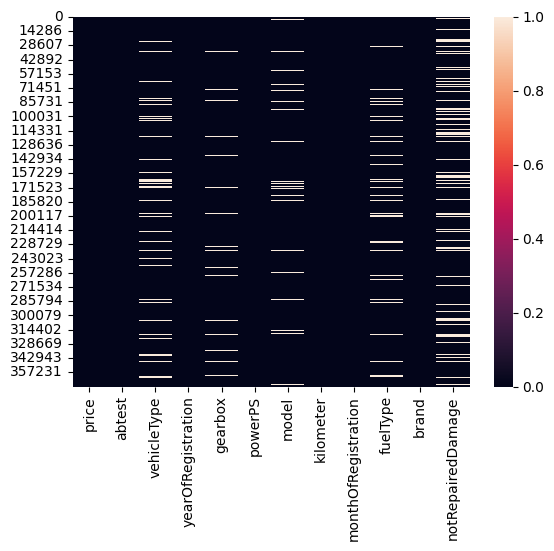

In [57]:
sns.heatmap(df.isnull())#esse metodo nos mostra a mapa de calor de cada dado nulo. as linhas brancas representam a quantidade de dados nulos em cada coluna

In [58]:
df.loc[pd.isnull(df.vehicleType)]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
16,300,test,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN
22,2900,test,NaN,2018,manuell,90,meriva,150000,5,benzin,opel,nein
26,5555,control,NaN,2017,manuell,125,c4,125000,4,NaN,citroen,nein
31,899,control,NaN,2016,manuell,60,clio,150000,6,benzin,renault,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371495,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN
371504,2600,control,NaN,2005,automatik,0,c_klasse,150000,9,NaN,mercedes_benz,NaN
371509,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein
371519,5250,control,NaN,2016,automatik,150,159,150000,12,NaN,alfa_romeo,nein


In [59]:
df['vehicleType'].value_counts() #limousine

,count
vehicleType,
limousine,93614
kleinwagen,78014
kombi,65921
bus,29699
cabrio,22509
coupe,18386
suv,14477
andere,3125


In [62]:
df.loc[pd.isnull(df.gearbox)]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
15,450,test,kleinwagen,1910,NaN,0,ka,5000,0,benzin,ford,NaN
16,300,test,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN
32,245,test,limousine,1994,NaN,0,golf,150000,2,benzin,volkswagen,nein
37,1500,test,NaN,2016,NaN,0,kangoo,150000,1,diesel,renault,nein
70,1200,test,coupe,2001,NaN,0,astra,150000,0,NaN,opel,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371443,3300,control,kombi,2006,NaN,0,touran,150000,7,diesel,volkswagen,NaN
371460,3500,control,NaN,1995,NaN,0,polo,150000,0,NaN,volkswagen,NaN
371486,350,control,kleinwagen,1996,NaN,65,punto,150000,0,NaN,fiat,NaN
371495,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN


In [63]:
df['gearbox'].value_counts() #manuell

,count
gearbox,
manuell,266547
automatik,75508


In [64]:
df.loc[pd.isnull(df.model)]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
83,350,control,kleinwagen,1997,manuell,54,NaN,150000,3,NaN,fiat,ja
139,1450,control,limousine,1992,manuell,136,NaN,150000,0,NaN,audi,nein
156,6799,control,kleinwagen,2009,NaN,60,NaN,20000,5,benzin,volkswagen,nein
165,500,control,kleinwagen,1999,manuell,0,NaN,150000,0,benzin,renault,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371399,560,control,kleinwagen,2001,automatik,170,NaN,90000,0,benzin,fiat,ja
371476,9400,control,kombi,2007,manuell,200,NaN,150000,4,diesel,sonstige_autos,ja
371495,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN
371509,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein


In [66]:
df['model'].value_counts() #golf

,count
model,
golf,28989
andere,25560
3er,19905
polo,12604
corsa,12149
...,...
serie_2,8
rangerover,6
serie_3,3


In [67]:
df.loc[pd.isnull(df.fuelType)]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
9,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN
13,2500,control,kombi,2004,manuell,131,passat,150000,2,NaN,volkswagen,nein
26,5555,control,NaN,2017,manuell,125,c4,125000,4,NaN,citroen,nein
36,1600,control,andere,1991,manuell,75,kadett,70000,0,NaN,opel,NaN
41,7500,control,limousine,2002,automatik,306,e_klasse,150000,4,NaN,mercedes_benz,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371496,3850,test,cabrio,2006,manuell,108,2_reihe,125000,2,NaN,peugeot,nein
371504,2600,control,NaN,2005,automatik,0,c_klasse,150000,9,NaN,mercedes_benz,NaN
371509,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein
371519,5250,control,NaN,2016,automatik,150,159,150000,12,NaN,alfa_romeo,nein


In [68]:
df['fuelType'].value_counts() #benzin

,count
fuelType,
benzin,217582
diesel,106002
lpg,5222
cng,557
hybrid,271
andere,165
elektro,101


In [70]:
df.loc[pd.isnull(df.notRepairedDamage)]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
8,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN
9,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN
12,999,control,kombi,1995,manuell,115,passat,150000,11,benzin,volkswagen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371507,5999,test,kombi,2005,manuell,140,a4,150000,4,diesel,audi,NaN
371514,999,control,cabrio,2000,manuell,95,megane,150000,4,benzin,renault,NaN
371515,1690,test,kombi,2004,manuell,55,fabia,150000,4,benzin,skoda,NaN
371523,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN


In [72]:
df['notRepairedDamage'].value_counts() #nein

,count
notRepairedDamage,
nein,259301
ja,34004


In [73]:
valores = {'vehicleType': 'limousine', #fazendo substituição de valores predominantes para acabar com os dados nulos
'gearbox':'manuell',
'model':'golf',
'fuelType':'benzin',
 'notRepairedDamage':'nein'}

In [74]:
df = df.fillna(value=valores)

In [75]:
df.isnull().sum()

,0
price,0
abtest,0
vehicleType,0
yearOfRegistration,0
gearbox,0
powerPS,0
model,0
kilometer,0
monthOfRegistration,0
fuelType,0


In [77]:
previsores = df.drop(['price'],axis=1)#definindo variaveis previsoras
preco = df['price'] #definindo variaveis de predição

In [78]:
preco.shape, previsores.shape

((359291,), (359291, 11))

In [98]:
from sklearn.preprocessing import OneHotEncoder #tratamento de colunas com variaveis categoricas

In [101]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer # Import ColumnTransformer

onehotencoder = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(),
                                                   [0,1,3,5,8,9,10])],
                                  remainder = 'passthrough')

In [102]:
previsores = onehotencoder.fit_transform(previsores).toarray()#ja setamos que queremos a transformação direto para o tipo numpy

In [103]:
previsores.shape

(359291, 316)

In [104]:
type(previsores)

numpy.ndarray

In [105]:
previsores = torch.tensor(previsores).float()

In [112]:
preco = np.array(preco) #antes, nossa variavel preco n foi categorizada como numpay array, fiz essa mudança agora
type(preco)
preco = torch.tensor(preco).float()
type(preco)

torch.Tensor

In [113]:
preco.shape

torch.Size([359291])

## CONTRUÇÃO DO MODELO

In [ ]:
#NOSSO MODELO POSSUI 316 COLUNAS DE ENTRADA, COM ISSO, TEMOS QUE FAZER UM CALCULO PARA SABER QUANTOS NEURONIOS NOSSA REDE IRA RECEBER
#316 -> 158 -> 158 -> 158,5
#(entrada + saida) / 2 --(316 + 1)/2

In [117]:
#Criação do modelo, aqui definimos as ligaçoes das entradas com a camada de neuronios, função de ativação e saidas
regressor = nn.Sequential(nn.Linear(316,158),
                          nn.ReLU(),
                          nn.Linear(158,158),
                          nn.ReLU(),
                          nn.Linear(158,1))

In [120]:
criterion = nn.L1Loss() #critertio para o calculo de erro

In [121]:
optimizer = optim.Adam(regressor.parameters()) #otimizador


In [123]:
dataset = torch.utils.data.TensorDataset(previsores, preco) #criação do dataset no torch
train_loader = torch.utils.data.DataLoader(dataset, batch_size=300,shuffle=True) #embaralhar o treinamento

##TREINAMENTO

In [126]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [127]:
regressor.to(device)

Sequential(
  (0): Linear(in_features=316, out_features=158, bias=True)
  (1): ReLU()
  (2): Linear(in_features=158, out_features=158, bias=True)
  (3): ReLU()
  (4): Linear(in_features=158, out_features=1, bias=True)
)

In [130]:
for epoch in range(100):
  running_loss=0.0
  running_mae = 0

  for i, data in enumerate(train_loader):
    inputs, labels = data

    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()

    outputs = regressor(inputs)


    mae = F.l1_loss(outputs, labels).item()

    running_mae += mae

    loss = criterion(outputs, labels)

    loss.backward()

    optimizer.step()

    running_loss += loss.item()

    print('\rÉpoca {:3d} - Loop{:3d}: perda{:06.2f}-MAE{:06.2f}'.format(epoch+1,
                                                                      i+1,
                                                                      running_loss / (i+1), mae))

  print('Epoca {:3d} finalizada: perda{:0.5f} - MAE{:0.5f}'.format(epoch+1,running_loss/len(train_loader),
                                                                     running_mae/len(train_loader)))

<ipython-input-130-130a82f02811>:16: UserWarning: Using a target size (torch.Size([300])) that is different to the input size (torch.Size([300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mae = F.l1_loss(outputs, labels).item()
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([300])) that is different to the input size (torch.Size([300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Época   1 - Loop  1: perda6136.03-MAE6136.03
Época   1 - Loop  2: perda5744.48-MAE5352.92
Época   1 - Loop  3: perda5317.70-MAE4464.13
Época   1 - Loop  4: perda5256.09-MAE5071.28
Época   1 - Loop  5: perda5228.50-MAE5118.15
Época   1 - Loop  6: perda5315.63-MAE5751.28
Época   1 - Loop  7: perda5206.69-MAE4553.02
Época   1 - Loop  8: perda5091.23-MAE4283.04
Época   1 - Loop  9: perda5092.89-MAE5106.20
Época   1 - Loop 10: perda5033.98-MAE4503.75
Época   1 - Loop 11: perda4992.99-MAE4583.07
Época   1 - Loop 12: perda4999.62-MAE5072.58
Época   1 - Loop 13: perda5041.55-MAE5544.73
Época   1 - Loop 14: perda5027.99-MAE4851.69
Época   1 - Loop 15: perda5001.63-MAE4632.61
Época   1 - Loop 16: perda4985.49-MAE4743.29
Época   1 - Loop 17: perda4962.98-MAE4602.95
Época   1 - Loop 18: perda4944.96-MAE4638.49
Época   1 - Loop 19: perda4913.80-MAE4353.02
Época   1 - Loop 20: perda4905.55-MAE4748.78
Época   1 - Loop 21: perda4907.97-MAE4956.41
Época   1 - Loop 22: perda4875.19-MAE4186.81
Época   1 

<ipython-input-130-130a82f02811>:16: UserWarning: Using a target size (torch.Size([191])) that is different to the input size (torch.Size([191, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mae = F.l1_loss(outputs, labels).item()
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([191])) that is different to the input size (torch.Size([191, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


A saída de streaming foi truncada nas últimas 5000 linhas.
Época  96 - Loop996: perda4530.00-MAE4372.78
Época  96 - Loop997: perda4529.69-MAE4227.20
Época  96 - Loop998: perda4528.83-MAE3671.54
Época  96 - Loop999: perda4528.73-MAE4420.75
Época  96 - Loop1000: perda4528.43-MAE4227.59
Época  96 - Loop1001: perda4528.57-MAE4671.63
Época  96 - Loop1002: perda4528.76-MAE4723.44
Época  96 - Loop1003: perda4529.02-MAE4783.64
Época  96 - Loop1004: perda4528.55-MAE4055.92
Época  96 - Loop1005: perda4528.63-MAE4609.58
Época  96 - Loop1006: perda4528.94-MAE4845.68
Época  96 - Loop1007: perda4529.06-MAE4648.63
Época  96 - Loop1008: perda4530.23-MAE5704.71
Época  96 - Loop1009: perda4530.44-MAE4741.12
Época  96 - Loop1010: perda4530.21-MAE4303.20
Época  96 - Loop1011: perda4530.40-MAE4721.00
Época  96 - Loop1012: perda4530.53-MAE4661.78
Época  96 - Loop1013: perda4530.74-MAE4739.24
Época  96 - Loop1014: perda4530.65-MAE4447.25
Época  96 - Loop1015: perda4530.66-MAE4539.36
Época  96 - Loop1016: per

## AVALIAÇÃO

In [132]:
regressor.eval()#transformar o modelo para modo de avaliação

Sequential(
  (0): Linear(in_features=316, out_features=158, bias=True)
  (1): ReLU()
  (2): Linear(in_features=158, out_features=158, bias=True)
  (3): ReLU()
  (4): Linear(in_features=158, out_features=1, bias=True)
)

In [135]:
previsoes = regressor(previsores)
previsoes[0]

tensor([3198.7288], grad_fn=<SelectBackward0>)

In [136]:
preco[0]

tensor(480.)

In [137]:
previsoes.mean()

tensor(3217.7141, grad_fn=<MeanBackward0>)

In [138]:
preco.mean()

tensor(5916.8335)

In [140]:
#calculo para desvio de erro
5916.8335 - 3217.7141

2699.1193999999996

In [141]:
previsoes = regressor.forward(previsores.to(device))

In [148]:
previsoes[0]

tensor([3198.7288], grad_fn=<SelectBackward0>)

In [146]:
preco[0]

tensor(480.)

com isso, temos que o algoritimo ERRA tanto 'para cima' tanto 'para baixo' uma media de '2699.119' em euros